In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the data
df = pd.read_csv("/content/drive/MyDrive/Book11.csv")
df.head()

,age,gender,height_cm,weight_kg,Excersise,class
0,27,M,172.3,75.24,1,C
1,25,M,165.0,55.80,0,A
2,31,M,179.6,78.00,1,C
3,32,M,174.5,71.10,1,B
4,28,M,173.8,67.70,1,B


In [6]:
# Feature Engineering (you can add more feature engineering here)
df.rename({'class': 'Classi'}, axis=1, inplace=True)
df.replace({"A": 1, "B": 2, "C": 3, "D": 4}, inplace=True)
df.head()

,age,gender,height_cm,weight_kg,Excersise,Classi
0,27,M,172.3,75.24,1,3
1,25,M,165.0,55.80,0,1
2,31,M,179.6,78.00,1,3
3,32,M,174.5,71.10,1,2
4,28,M,173.8,67.70,1,2


In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])
df.head()

,age,gender,height_cm,weight_kg,Excersise,Classi
0,27,1,172.3,75.24,1,3
1,25,1,165.0,55.80,0,1
2,31,1,179.6,78.00,1,3
3,32,1,174.5,71.10,1,2
4,28,1,173.8,67.70,1,2


<Axes: >

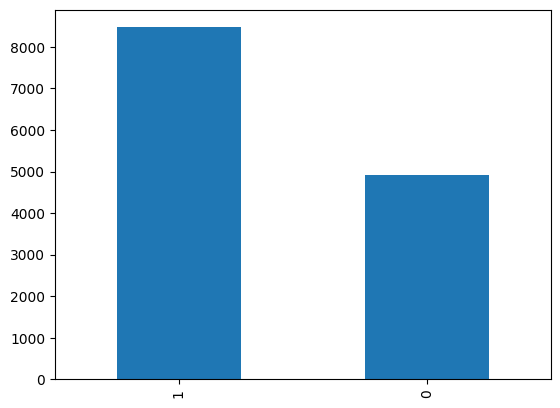

In [10]:
df.gender.value_counts().plot.bar()

<Axes: >

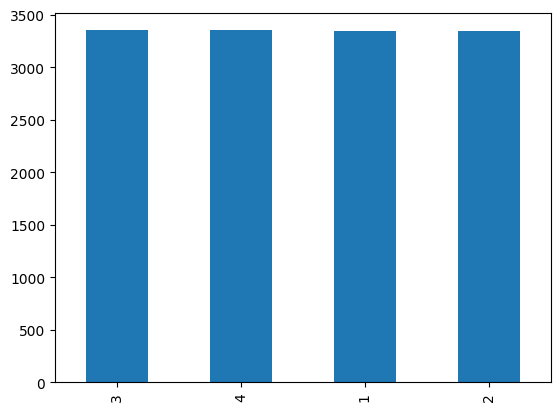

In [11]:
df.Classi.value_counts().plot.bar()

<Axes: >

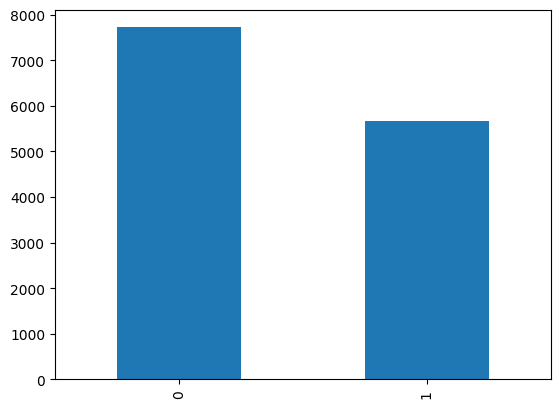

In [12]:
df.Excersise.value_counts().plot.bar()

<Axes: xlabel='Excersise', ylabel='Classi'>

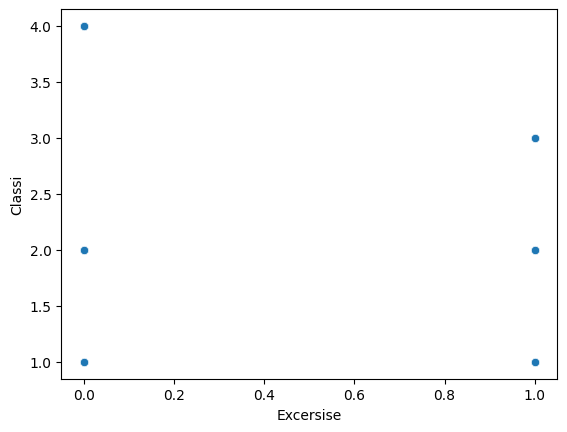

In [13]:
import seaborn as sns
sns.scatterplot(x=df.Excersise,y = df.Classi)

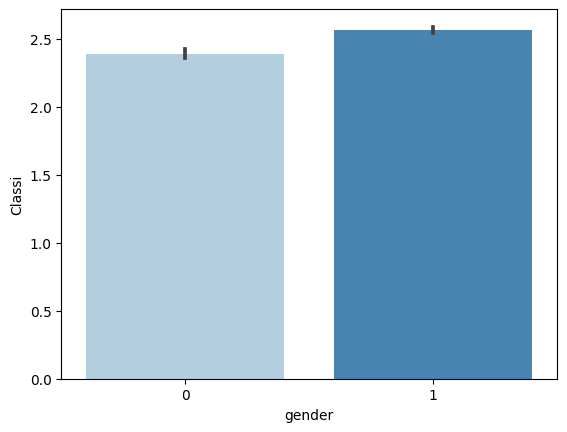

In [14]:
import matplotlib.pyplot as plt
sns.barplot(x = 'gender',y = 'Classi',data
 = df, palette = "Blues")
#Adding the aesthetics
#plt.title('Comparative Ananlysis')
#///plt.xlabel('Active users in Facebook')
#plt.ylabel('Gender of users')
# Show the plot
plt.show()

<Axes: xlabel='gender', ylabel='Classi'>

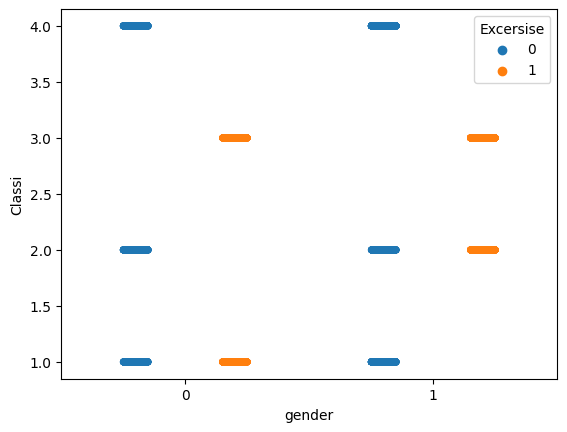

In [15]:
sns.stripplot(x ='gender', y ='Classi', data = df,jitter = True, hue ='Excersise', dodge = True)


In [31]:
#Loading the data
#method 1 - using iloc X->Independent variable Y->dependent var
X = df.iloc[:,:-1].values #2D array
Y = df.iloc[:,-1].values #2D array
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [32]:
# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [34]:
# Evaluate the model
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [35]:
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

In [36]:
print("Training accuracy:", train_accuracy * 100)
print("Testing accuracy:", test_accuracy * 100)

Training accuracy: 99.9533320888557
Testing accuracy: 57.969391564016426


In [37]:
# Calculate overall accuracy on the entire dataset
X = scaler.transform(X)
Y_pred = model.predict(X)
accuracy = accuracy_score(Y, Y_pred)
print("Overall accuracy:", accuracy * 100)

Overall accuracy: 91.55529007690585


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

ValueError: ignored